<a href="https://colab.research.google.com/github/Isha-Ismail/Network-Intrusion-Implementation/blob/main/Deep%20Learning/%20NSL%20KDD/DL_Binary_on_NSL%2BKDD_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [3]:
!pip install pytorch_tabnet
!pip install pytorch_tabular
!pip install catboost
!pip install deeptables

     |████████████████████████████████| 2.0 MB 3.9 MB/s 
     |████████████████████████████████| 80 kB 5.5 MB/s 
     |████████████████████████████████| 9.5 MB 28.3 MB/s 
     |████████████████████████████████| 809 kB 41.8 MB/s 
     |████████████████████████████████| 78 kB 5.3 MB/s 
     |████████████████████████████████| 409 kB 40.8 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 636 kB 43.4 MB/s 
     |████████████████████████████████| 136 kB 47.9 MB/s 
     |████████████████████████████████| 829 kB 47.8 MB/s 
     |████████████████████████████████| 1.1 MB 42.6 MB/s 
     |████████████████████████████████| 117 kB 18.5 MB/s 
     |████████████████████████████████| 271 kB 57.8 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 55.9 MB/s 
  Created wheel for pytorch-tabular: filename=pytorch_tabular-0.7.0-py2.py3-none-any.whl size=83790 sha256=82e9781426c65dc79d6e98a8a0900c

     |████████████████████████████████| 76.6 MB 1.1 MB/s 
     |████████████████████████████████| 832 kB 3.9 MB/s 
     |████████████████████████████████| 1.7 MB 53.0 MB/s 
     |████████████████████████████████| 2.9 MB 45.1 MB/s 
     |████████████████████████████████| 216 kB 45.4 MB/s 
     |████████████████████████████████| 212 kB 54.4 MB/s 
     |████████████████████████████████| 149 kB 59.7 MB/s 
     |████████████████████████████████| 353 kB 64.1 MB/s 
     |████████████████████████████████| 207 kB 60.6 MB/s 
     |████████████████████████████████| 837 kB 49.7 MB/s 
     |████████████████████████████████| 172 kB 60.1 MB/s 
     |████████████████████████████████| 280 kB 57.2 MB/s 
     |████████████████████████████████| 1.1 MB 58.2 MB/s 
     |████████████████████████████████| 11.3 MB 40.9 MB/s 
     |████████████████████████████████| 133 kB 59.4 MB/s 
     |████████████████████████████████| 856 kB 56.5 MB/s 
     |████████████████████████████████| 62 kB 831 kB/s 
     |██████████

In [4]:
import warnings
warnings.filterwarnings('ignore')

from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import precision_recall_fscore_support
# build the lightgbm model
import lightgbm as lgb

from catboost import CatBoostClassifier, Pool
from hyperopt import fmin, hp, tpe
import pandas as pd
from sklearn.model_selection import StratifiedKFold

import numpy as np
from deeptables.models import deeptable, deepnets
from deeptables.datasets import dsutils
from sklearn.model_selection import train_test_split

In [1]:
!pip  install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=51ed2aabb5f78ae5a0d52932ad76f4079763bbd62feae0d0de1b1c39601b1f43
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget
print('Downloading binary dataset.....')
data = wget.download('https://dl.dropboxusercontent.com/s/ceup379ooybbpyo/bin_data.csv?dl=0')

# read csv

In [5]:
df  = pd.read_csv(data)
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal


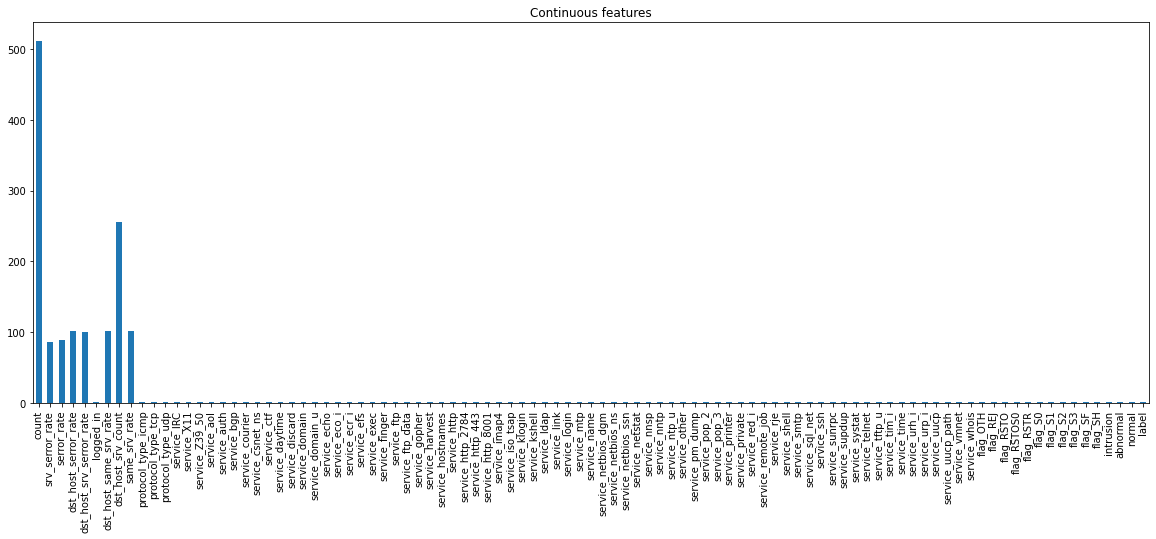

In [ ]:
import matplotlib.pyplot as plt
plt.title('Continuous features')
df.nunique().plot(kind='bar', figsize=(20,7))

In [ ]:
# df.info()
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

In [ ]:
X = df[['count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'logged_in', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'same_srv_rate']]
y = df['label']

Spliting for TabNEt

In [ ]:
# split data into train, test and validation set with splitted feature and class
def get_train_test_val_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22, random_state=2)
    return X_train, X_test, X_val, y_train, y_test, y_val
# get train, test and validation set
X_train, X_test, X_val, y_train, y_test, y_val = get_train_test_val_split()


Build CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical

In [ ]:
# deep learning model initialization
model = tf.keras.models.Sequential()  
model.add(Dense(1000,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

New_X_train = model.predict(X_train)
New_X_test = model.predict(X_test)
New_X_val = model.predict(X_val)

Evaluation Function

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

# 01 TabNet

TabNet provides a high-performance and interpretable tabular data deep learning architecture. It uses a method called sequential attention mechanism to enabling which feature to choose to cause high interpretability and efficient training.

In [ ]:
# get train, test and validation set
# X_train, X_test, X_val, y_train, y_test, y_val = get_train_test_val_split()

# initialize model
clf = TabNetClassifier()  #TabNetRegressor()
# fit model
clf.fit(
  New_X_train, y_train,
  eval_set=[(New_X_val, y_val)]
)

Device used : cpu
epoch 0  | loss: 0.23566 | val_0_auc: 0.89356 |  0:00:04s
epoch 1  | loss: 0.1886  | val_0_auc: 0.86553 |  0:00:08s
epoch 2  | loss: 0.1893  | val_0_auc: 0.86931 |  0:00:12s
epoch 3  | loss: 0.18682 | val_0_auc: 0.84832 |  0:00:16s
epoch 4  | loss: 0.17859 | val_0_auc: 0.85051 |  0:00:20s
epoch 5  | loss: 0.17721 | val_0_auc: 0.85723 |  0:00:24s
epoch 6  | loss: 0.1726  | val_0_auc: 0.88099 |  0:00:28s
epoch 7  | loss: 0.17415 | val_0_auc: 0.92131 |  0:00:31s
epoch 8  | loss: 0.17042 | val_0_auc: 0.96809 |  0:00:35s
epoch 9  | loss: 0.17231 | val_0_auc: 0.97475 |  0:00:39s
epoch 10 | loss: 0.1703  | val_0_auc: 0.97896 |  0:00:43s
epoch 11 | loss: 0.16959 | val_0_auc: 0.97979 |  0:00:47s
epoch 12 | loss: 0.16846 | val_0_auc: 0.97997 |  0:00:51s
epoch 13 | loss: 0.17314 | val_0_auc: 0.97934 |  0:00:55s
epoch 14 | loss: 0.17535 | val_0_auc: 0.98044 |  0:00:59s
epoch 15 | loss: 0.16955 | val_0_auc: 0.98051 |  0:01:03s
epoch 16 | loss: 0.17345 | val_0_auc: 0.97948 |  0:01:

## make predictions

========== TabNet Model ==========

Accuracy on validation set: 0.9315

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      5872
           1       0.93      0.94      0.94      6726

    accuracy                           0.93     12598
   macro avg       0.93      0.93      0.93     12598
weighted avg       0.93      0.93      0.93     12598



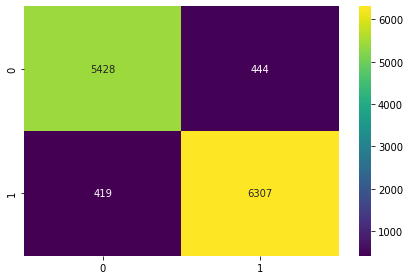

[0.9314970630258771,
 0.9312856424718841,
 0.9310456757744359,
 0.9311619408561124]

In [ ]:
# make prediction using trained model
y_pred = clf.predict(New_X_test)
# calculate accuracy and other evaluation measures
modelEvaluation(y_test, y_pred, 'TabNet Model')

# 02 Light Gradient Boosted Machine

In [ ]:
# get train, test and validation set
# X_train, X_test, y_train, y_test = get_train_test_split()
# initialize model
clf = lgb.LGBMClassifier()
# fit model
clf.fit(New_X_train, y_train)

LGBMClassifier()

## make predictions

========== Light Gradient Boosted Machine ==========

Accuracy on validation set: 0.9521

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      5804
           1       0.96      0.95      0.96      6794

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598



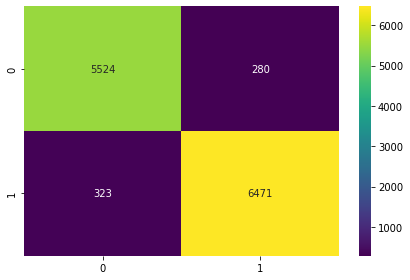

[0.9521352595650103,
 0.9516413292830811,
 0.9521077299526663,
 0.9518632567150211]

In [ ]:
# make prediction using trained model
y_pred = clf.predict(New_X_test)
# calculate accuracy and other evaluation measures
modelEvaluation(y_test, y_pred, 'Light Gradient Boosted Machine')

# 03 CatBoost
“CatBoost” name comes from two words “Category” and “Boosting”. As discussed, the library works well with multiple Categories of data, such as audio, text, image including historical data. “Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library.

In [ ]:
# get train, test and validation set
# X_train, X_test, y_train, y_test = get_train_test_split()

# preparing data for model training
train_pool = Pool(New_X_train, y_train)
test_pool = Pool(New_X_test, y_test)

In [ ]:
# model hyper paramete settings
search_space = {'iterations': hp.quniform('iterations', 10, 1000, 10),
                'depth': hp.quniform('depth', 2, 12, 1),
                'lr': hp.uniform('lr', 0.01, 1)
               }

# model initialization and training
model = CatBoostClassifier(iterations=100,
                             depth=8,
                             learning_rate=1,
                             loss_function='MultiClass') 
model.fit(train_pool)

0:	learn: 0.2614993	total: 120ms	remaining: 11.8s
1:	learn: 0.1937991	total: 179ms	remaining: 8.77s
2:	learn: 0.1686545	total: 239ms	remaining: 7.73s
3:	learn: 0.1583732	total: 299ms	remaining: 7.18s
4:	learn: 0.1519975	total: 363ms	remaining: 6.89s
5:	learn: 0.1483731	total: 420ms	remaining: 6.58s
6:	learn: 0.1444885	total: 479ms	remaining: 6.37s
7:	learn: 0.1414195	total: 546ms	remaining: 6.27s
8:	learn: 0.1393525	total: 607ms	remaining: 6.14s
9:	learn: 0.1381852	total: 677ms	remaining: 6.09s
10:	learn: 0.1363115	total: 730ms	remaining: 5.91s
11:	learn: 0.1352618	total: 792ms	remaining: 5.81s
12:	learn: 0.1338097	total: 856ms	remaining: 5.73s
13:	learn: 0.1328127	total: 912ms	remaining: 5.6s
14:	learn: 0.1318187	total: 969ms	remaining: 5.49s
15:	learn: 0.1302870	total: 1.03s	remaining: 5.4s
16:	learn: 0.1297938	total: 1.09s	remaining: 5.31s
17:	learn: 0.1287006	total: 1.14s	remaining: 5.2s
18:	learn: 0.1281057	total: 1.19s	remaining: 5.09s
19:	learn: 0.1272892	total: 1.26s	remaining:

========== CatBoost ==========

Accuracy on validation set: 0.9525

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      5857
           1       0.95      0.96      0.96      6741

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598



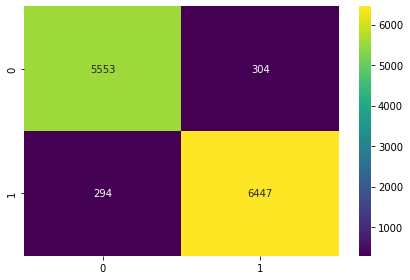

[0.9525321479599936,
 0.9523437190651648,
 0.9522412939332385,
 0.9522918976415784]

In [ ]:
# make prediction using trained model
predictions = model.predict(test_pool)
# calculate accuracy and other evaluation measures
y_pred = [pred[0] for pred in predictions]
# make_predictions(y_test, y_pred)
modelEvaluation(y_test, y_pred, 'CatBoost')

# 04 Deeptables

In [ ]:
# get train, test and validation set
# X_train, X_test, X_val, y_train, y_test, y_val = get_train_test_val_split()
# initialize model
config = deeptable.ModelConfig(nets=deepnets.DeepFM)
dt = deeptable.DeepTable()
# fit model
model, history = dt.fit(New_X_train, y_train, validation_data=(New_X_val, y_val), epochs=50)

04-26 09:07:36 I deeptables.m.deeptable.py 338 - X.Shape=(88432, 15), y.Shape=(88432,), batch_size=128, config=ModelConfig(name='conf-1', nets=['dnn_nets'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['accuracy'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=0.3, stacking_op='add', output_use_bias=True, apply_class_weight=False, optimizer='auto', loss='auto', dnn_params={'hidden_units': ((128, 0, False), (64, 0, False)), 'activation': 'relu'}, autoint_params={'num_attention': 3, 'num_heads': 1, 'dropout_rate': 0, 'use_residual': True}, fgcnn_params={'fg_filters': (14, 16), 'fg_he

04-26 09:07:36 W deeptables.m.__init__.py 1395 - Column index of X has been converted: Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14'],
      dtype='object')


04-26 09:07:36 I deeptables.m.preprocessor.py 261 - Preparing features...
04-26 09:07:36 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.05325007438659668s
04-26 09:07:36 I deeptables.m.preprocessor.py 341 - Data imputation...
04-26 09:07:36 I deeptables.m.preprocessor.py 383 - Imputation taken 0.09333300590515137s
04-26 09:07:36 I deeptables.m.preprocessor.py 388 - Categorical encoding...
04-26 09:07:36 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.005875349044799805s
04-26 09:07:36 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.24115395545959473s
04-26 09:07:36 I deeptables.m.preprocessor.py 242 - Transform [X]...


04-26 09:07:36 W deeptables.m.__init__.py 1395 - Column index of X has been converted: Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14'],
      dtype='object')


04-26 09:07:36 I deeptables.m.preprocessor.py 249 - transform_X taken 0.02574467658996582s
04-26 09:07:36 I deeptables.m.preprocessor.py 230 - Transform [y]...
04-26 09:07:36 I deeptables.m.preprocessor.py 236 - transform_y taken 0.0017552375793457031s
04-26 09:07:36 I deeptables.m.deeptable.py 354 - Training...
04-26 09:07:36 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_accuracy, patience:1, mode:max
04-26 09:07:36 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=True, drop_remainder=True
04-26 09:07:36 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=True, drop_remainder=True
04-26 09:07:36 I deeptables.m.deepmodel.py 231 - Building model...
04-26 09:07:37 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
----------

04-26 09:10:06 I deeptables.m.deeptable.py 685 - Perform prediction...
04-26 09:10:06 I deeptables.m.preprocessor.py 242 - Transform [X]...


04-26 09:10:06 W deeptables.m.__init__.py 1395 - Column index of X has been converted: Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14'],
      dtype='object')


04-26 09:10:06 I deeptables.m.preprocessor.py 249 - transform_X taken 0.04150795936584473s
04-26 09:10:06 I deeptables.m.deepmodel.py 130 - Performing predictions...
04-26 09:10:06 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
04-26 09:10:06 I deeptables.m.deeptable.py 559 - predict_proba taken 0.6865286827087402s
04-26 09:10:06 I deeptables.m.deeptable.py 594 - Reverse indicators to labels.
========== DeepTables ==========

Accuracy on validation set: 0.9340

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5853
           1       0.94      0.94      0.94      6745

    accuracy                           0.93     12598
   macro avg       0.93      0.93      0.93     12598
weighted avg       0.93      0.93      0.93     12598



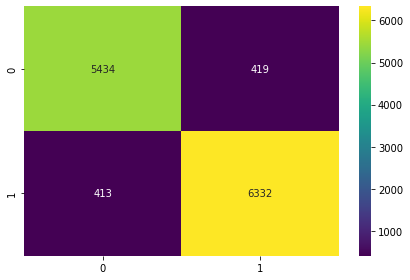

[0.9339577710747737,
 0.9336503036485837,
 0.9335911193147357,
 0.9336204966080485]

In [ ]:
# make prediction using trained model
preds = dt.predict(New_X_test)
# calculate accuracy and other evaluation measures
# make_predictions(y_test, preds)
modelEvaluation(y_test, preds, 'DeepTables')